In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ph√¢n t√≠ch v√† x·ª≠ l√Ω d·ªØ li·ªáu thi·∫øu trong Dataset Admission

sns.set()  # thi·∫øt l·∫≠p style m·∫∑c ƒë·ªãnh (seaborn-darkgrid)

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv('Admission_Predict.csv')

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n c·ªßa dataset
print("Th√¥ng tin c∆° b·∫£n v·ªÅ dataset:")
df.info()


Th√¥ng tin c∆° b·∫£n v·ªÅ dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [69]:
# B∆∞·ªõc 2: Th·ªëng k√™ m√¥ t·∫£ (trung b√¨nh, min, max, ƒë·ªô l·ªách chu·∫©n)
## 2. Th·ªëng k√™ m√¥ t·∫£ c∆° b·∫£n
df_stats = df.rename(columns=lambda x: x.strip())
df_stats = df.drop('Serial No.', axis=1)

# Th·ªëng k√™ m√¥ t·∫£ t·ªïng quan
print("Th·ªëng k√™ m√¥ t·∫£ t·ªïng quan:")
print(df_stats.describe())


Th·ªëng k√™ m√¥ t·∫£ t·ªïng quan:
        GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.598925    0.547500         0.724350  
std      0.596317    0.498362         0.142609  
min      6.800000    0.000000         0.340000  
25%      8.170000    0.0000

In [45]:
# Th√™m th·ªëng k√™ v·ªÅ ƒë·ªô l·ªách (skewness) v√† ƒë·ªô nh·ªçn (kurtosis)
print("\nƒê·ªô l·ªách (skewness) c·ªßa c√°c bi·∫øn:")
print(df_stats.skew())


ƒê·ªô l·ªách (skewness) c·ªßa c√°c bi·∫øn:
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64


In [46]:
print("\nƒê·ªô nh·ªçn (kurtosis) c·ªßa c√°c bi·∫øn:")
print(df_stats.kurtosis())


ƒê·ªô nh·ªçn (kurtosis) c·ªßa c√°c bi·∫øn:
GRE Score           -0.700489
TOEFL Score         -0.578778
University Rating   -0.796287
SOP                 -0.675610
LOR                 -0.662484
CGPA                -0.458476
Research            -1.973187
Chance of Admit     -0.389126
dtype: float64


In [47]:
## Ph√¢n t√≠ch chi ti·∫øt t·ª´ng nh√≥m bi·∫øn

# Ph√¢n t√≠ch ƒëi·ªÉm s·ªë (GRE, TOEFL, CGPA)
scores = ['GRE Score', 'TOEFL Score', 'CGPA']
print("\nTh·ªëng k√™ v·ªÅ ƒëi·ªÉm s·ªë:")
print(df_stats[scores].describe())

# Ph√¢n t√≠ch ƒë√°nh gi√° (University Rating, SOP, LOR)
ratings = ['University Rating', 'SOP', 'LOR '] 
print("\nTh·ªëng k√™ v·ªÅ c√°c ƒë√°nh gi√°:")
print(df_stats[ratings].describe())

# Ph√¢n t√≠ch Research v√† Chance of Admit
print("\nTh·ªëng k√™ v·ªÅ Research v√† Chance of Admit:")
print(df_stats[['Research', 'Chance of Admit ']].describe())


Th·ªëng k√™ v·ªÅ ƒëi·ªÉm s·ªë:
        GRE Score  TOEFL Score        CGPA
count  400.000000   400.000000  400.000000
mean   316.807500   107.410000    8.598925
std     11.473646     6.069514    0.596317
min    290.000000    92.000000    6.800000
25%    308.000000   103.000000    8.170000
50%    317.000000   107.000000    8.610000
75%    325.000000   112.000000    9.062500
max    340.000000   120.000000    9.920000

Th·ªëng k√™ v·ªÅ c√°c ƒë√°nh gi√°:
       University Rating         SOP        LOR 
count         400.000000  400.000000  400.000000
mean            3.087500    3.400000    3.452500
std             1.143728    1.006869    0.898478
min             1.000000    1.000000    1.000000
25%             2.000000    2.500000    3.000000
50%             3.000000    3.500000    3.500000
75%             4.000000    4.000000    4.000000
max             5.000000    5.000000    5.000000

Th·ªëng k√™ v·ªÅ Research v√† Chance of Admit:
         Research  Chance of Admit 
count  400.000000   

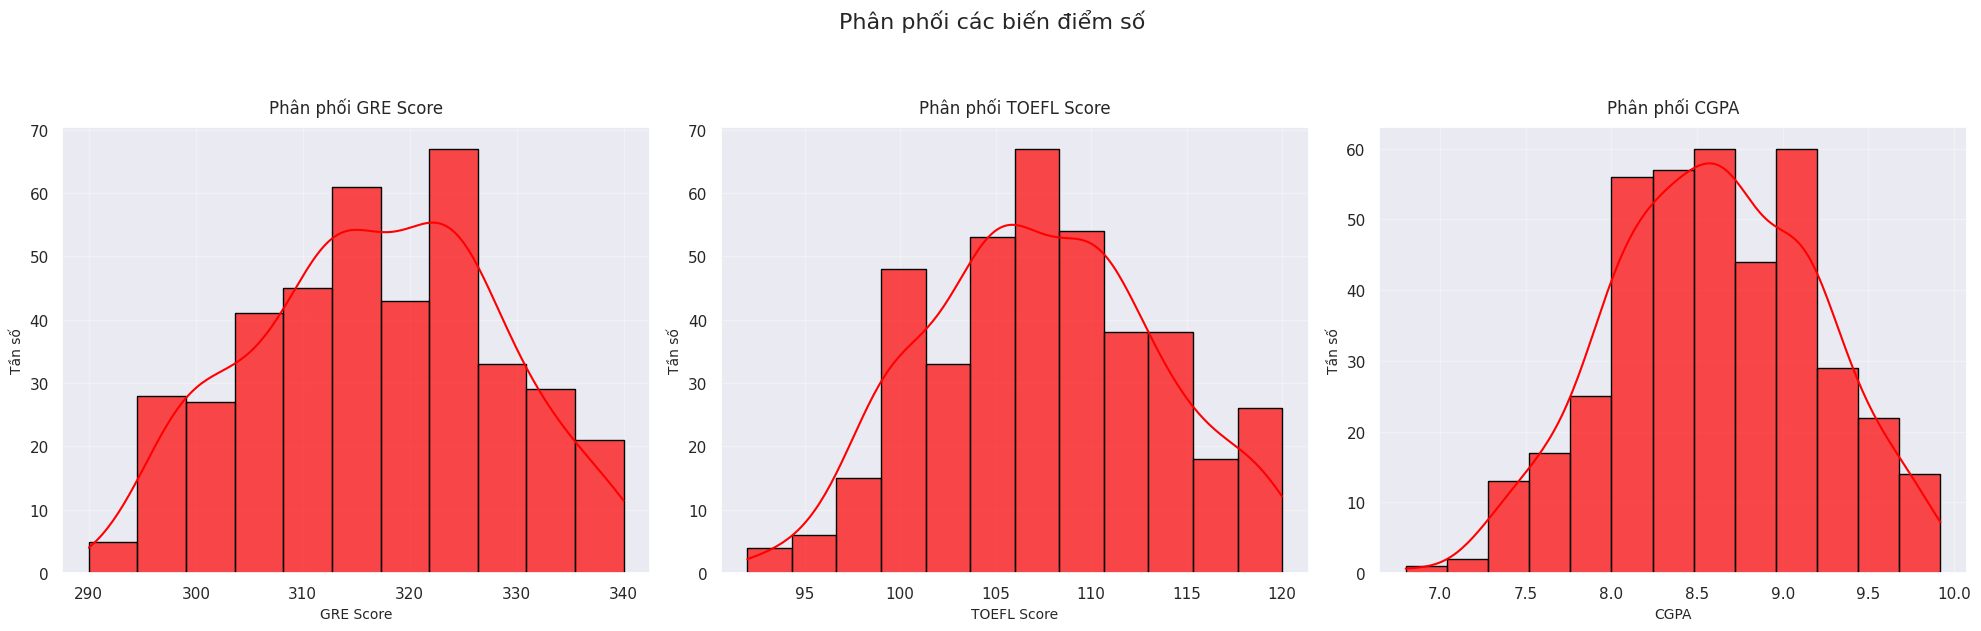

In [48]:
## B∆∞·ªõc 3: Tr·ª±c quan h√≥a ph√¢n ph·ªëi c√°c bi·∫øn ƒë·∫ßu v√†o (histogram, KDE plot)
# Tr·ª±c quan h√≥a ph√¢n ph·ªëi c√°c bi·∫øn ƒëi·ªÉm s·ªë

# T·∫°o subplot cho c√°c bi·∫øn ƒëi·ªÉm s·ªë
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Ph√¢n ph·ªëi c√°c bi·∫øn ƒëi·ªÉm s·ªë', fontsize=16, y=1.05)


for i, var in enumerate(scores):
    # V·∫Ω histogram v√† KDE plot v·ªõi m√†u s·∫Øc v√† style ƒë·∫πp h∆°n
    sns.histplot(data=df, x=var, kde=True, ax=axes[i], 
                color='red', edgecolor='black', alpha=0.7)
    
    # Th√™m ti√™u ƒë·ªÅ v√† nh√£n v·ªõi font size ph√π h·ª£p
    axes[i].set_title(f'Ph√¢n ph·ªëi {var}', fontsize=12, pad=10)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('T·∫ßn s·ªë', fontsize=10)
    
    # Th√™m l∆∞·ªõi ƒë·ªÉ d·ªÖ ƒë·ªçc
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

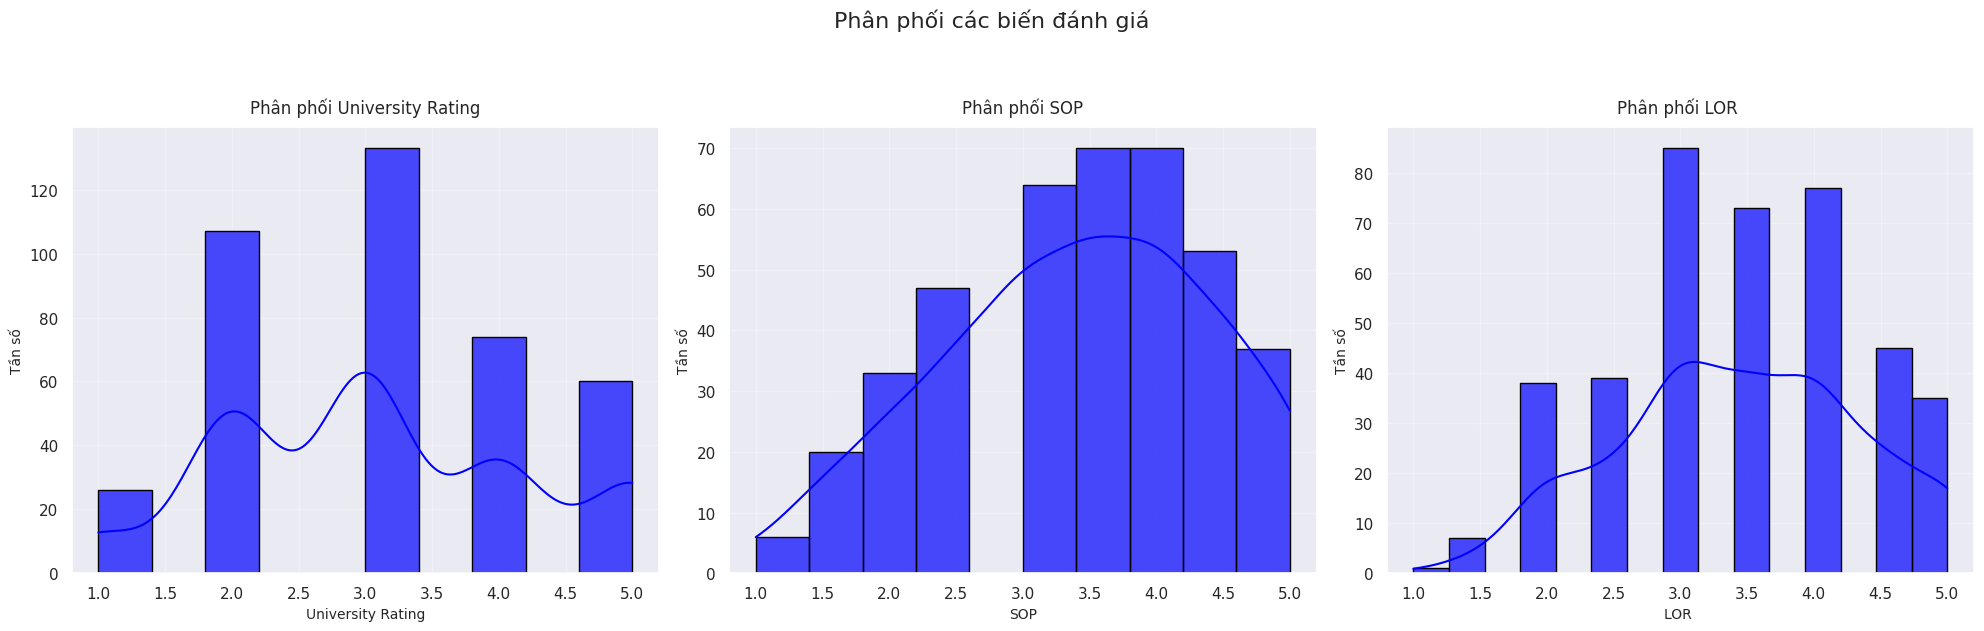

In [49]:
# Tr·ª±c quan h√≥a ph√¢n ph·ªëi c√°c bi·∫øn ƒë√°nh gi√°
# T·∫°o subplot cho c√°c bi·∫øn ƒë√°nh gi√°
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Ph√¢n ph·ªëi c√°c bi·∫øn ƒë√°nh gi√°', fontsize=16, y=1.05)


for i, var in enumerate(ratings):
    # V·∫Ω histogram v√† KDE plot v·ªõi m√†u s·∫Øc v√† style ƒë·∫πp h∆°n
    sns.histplot(data=df, x=var, kde=True, ax=axes[i],
                color='blue', edgecolor='black', alpha=0.7)
    
    # Th√™m ti√™u ƒë·ªÅ v√† nh√£n v·ªõi font size ph√π h·ª£p
    axes[i].set_title(f'Ph√¢n ph·ªëi {var}', fontsize=12, pad=10)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('T·∫ßn s·ªë', fontsize=10)
    
    # Th√™m l∆∞·ªõi ƒë·ªÉ d·ªÖ ƒë·ªçc
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_15104/70225724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Research', ax=axes[0],


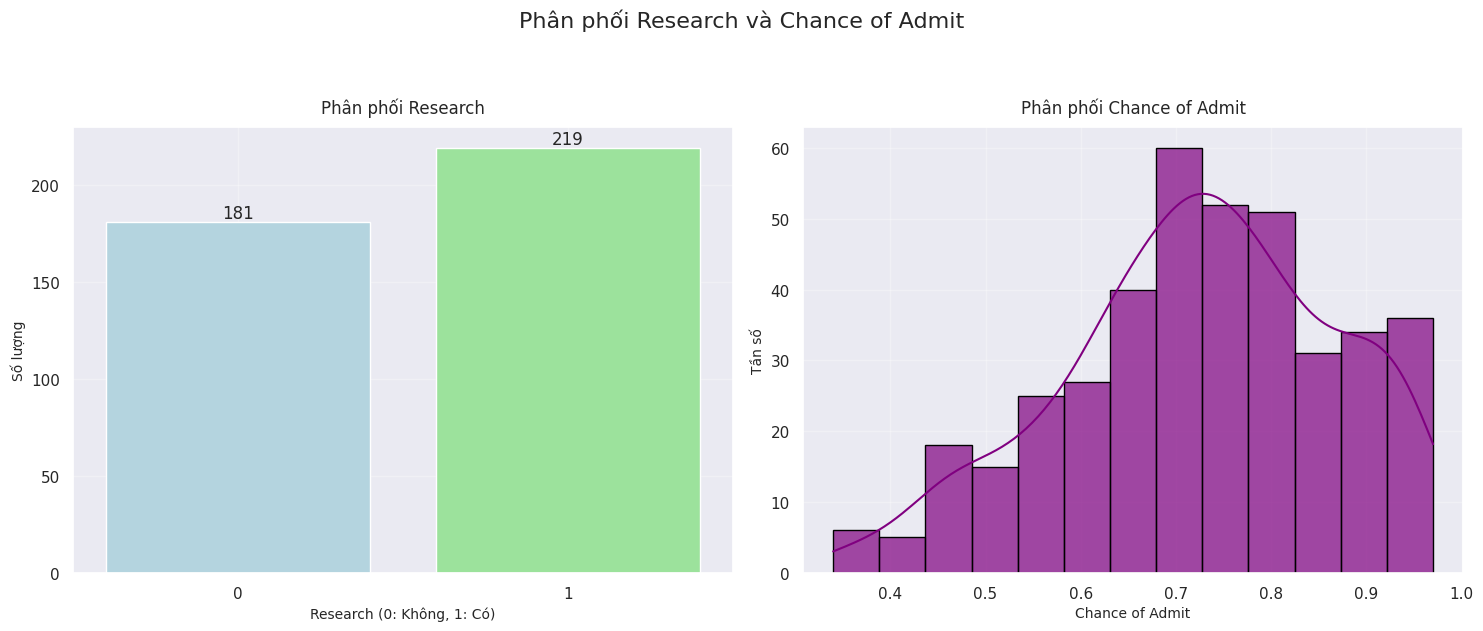

In [50]:
# Tr·ª±c quan h√≥a Research v√† Chance of Admit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Ph√¢n ph·ªëi Research v√† Chance of Admit', fontsize=16, y=1.05)

# V·∫Ω countplot cho Research
sns.countplot(data=df, x='Research', ax=axes[0], 
             palette=['lightblue', 'lightgreen'])
axes[0].set_title('Ph√¢n ph·ªëi Research', fontsize=12, pad=10)
axes[0].set_xlabel('Research (0: Kh√¥ng, 1: C√≥)', fontsize=10)
axes[0].set_ylabel('S·ªë l∆∞·ª£ng', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Th√™m s·ªë l∆∞·ª£ng c·ª• th·ªÉ tr√™n m·ªói c·ªôt
for i in axes[0].containers:
    axes[0].bar_label(i)

# V·∫Ω histogram v√† KDE plot cho Chance of Admit
sns.histplot(data=df, x='Chance of Admit ', kde=True, ax=axes[1],
            color='purple', edgecolor='black', alpha=0.7)
axes[1].set_title('Ph√¢n ph·ªëi Chance of Admit', fontsize=12, pad=10)
axes[1].set_xlabel('Chance of Admit', fontsize=10)
axes[1].set_ylabel('T·∫ßn s·ªë', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

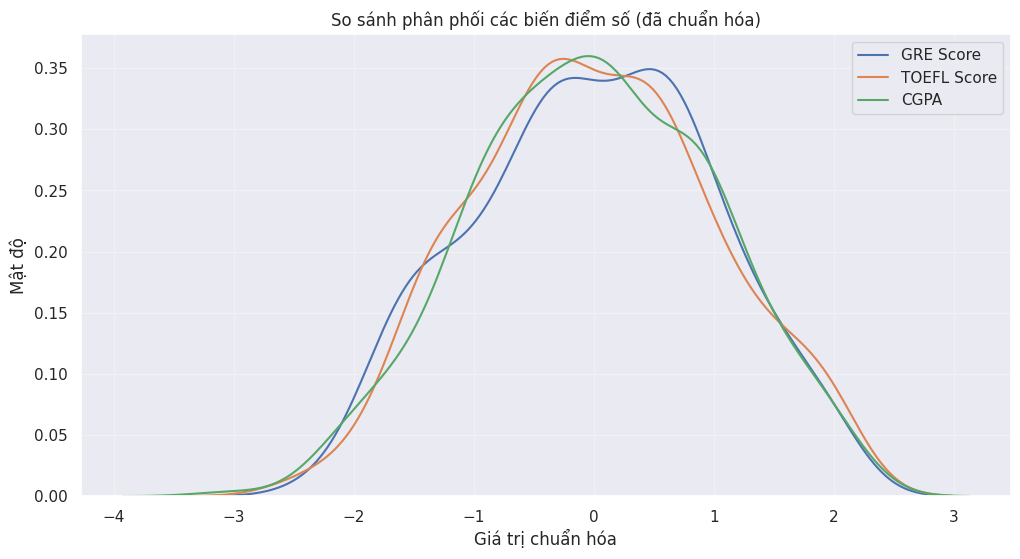

In [51]:
# So s√°nh ph√¢n ph·ªëi b·∫±ng KDE plot
# Chu·∫©n h√≥a c√°c bi·∫øn s·ªë ƒë·ªÉ c√≥ th·ªÉ so s√°nh tr√™n c√πng m·ªôt ƒë·ªì th·ªã
df_normalized = df.copy()
for column in scores:
    df_normalized[column] = (df[column] - df[column].mean()) / df[column].std()

# V·∫Ω KDE plot cho c√°c bi·∫øn ƒë√£ chu·∫©n h√≥a
plt.figure(figsize=(12, 6))
for var in scores:
    sns.kdeplot(data=df_normalized[var], label=var)

plt.title('So s√°nh ph√¢n ph·ªëi c√°c bi·∫øn ƒëi·ªÉm s·ªë (ƒë√£ chu·∫©n h√≥a)')
plt.xlabel('Gi√° tr·ªã chu·∫©n h√≥a')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

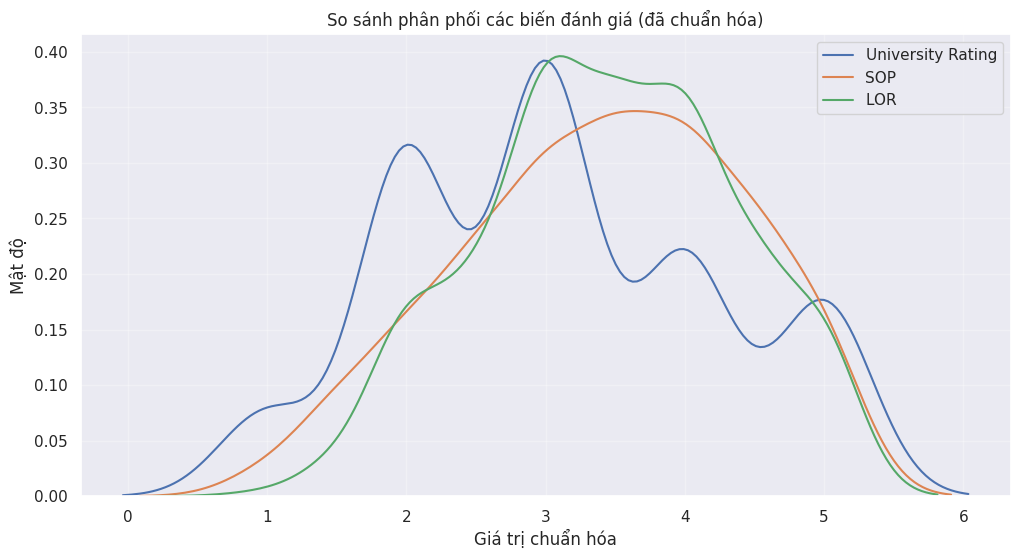

In [52]:
plt.figure(figsize=(12, 6))
for var in ratings:
    sns.kdeplot(data=df_normalized[var], label=var)

plt.title('So s√°nh ph√¢n ph·ªëi c√°c bi·∫øn ƒë√°nh gi√° (ƒë√£ chu·∫©n h√≥a)')
plt.xlabel('Gi√° tr·ªã chu·∫©n h√≥a')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



/tmp/ipykernel_15104/2626680869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melt, x='variable', y='value',


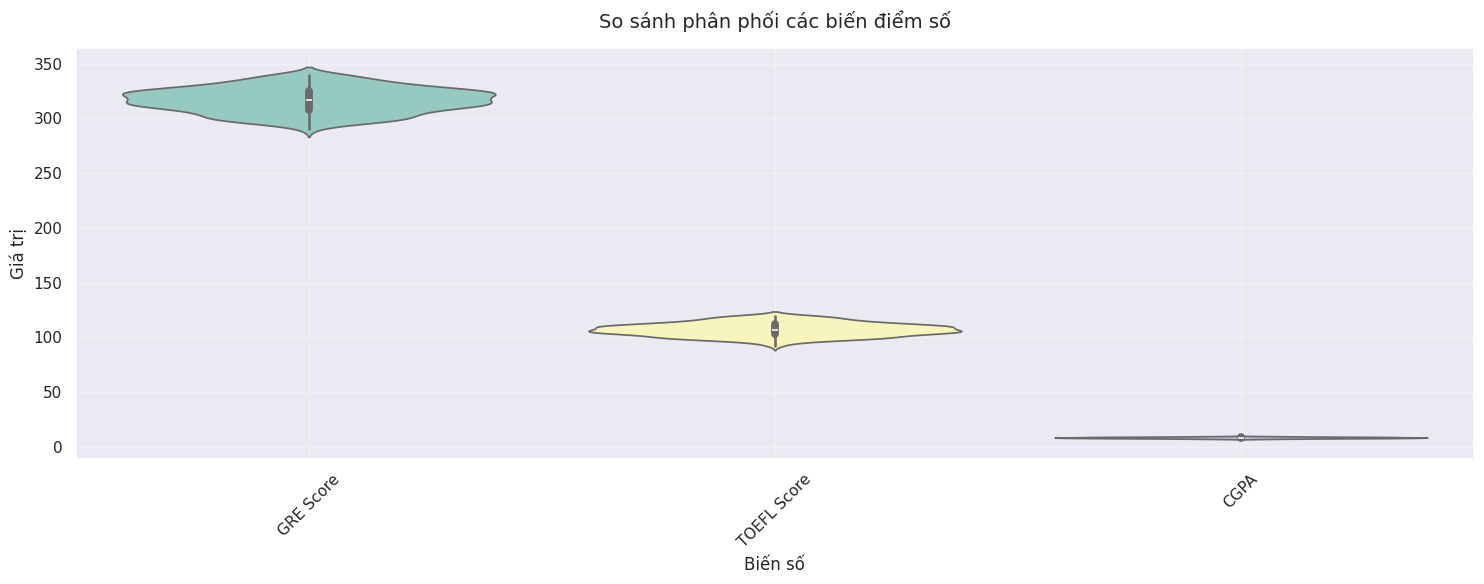

In [53]:
# T·∫°o violin plot ƒë·ªÉ so s√°nh ph√¢n ph·ªëi c√°c bi·∫øn ƒëi·ªÉm s·ªë
plt.figure(figsize=(15, 6))

# Chuy·ªÉn d·ªØ li·ªáu sang d·∫°ng long format ƒë·ªÉ v·∫Ω violin plot
df_melt = pd.melt(df[scores])

# V·∫Ω violin plot v·ªõi c√°c t√πy ch·ªânh v·ªÅ style
sns.violinplot(data=df_melt, x='variable', y='value', 
               palette='Set3', inner='box')

# T√πy ch·ªânh ƒë·ªì th·ªã
plt.title('So s√°nh ph√¢n ph·ªëi c√°c bi·∫øn ƒëi·ªÉm s·ªë', fontsize=14, pad=15)
plt.xlabel('Bi·∫øn s·ªë', fontsize=12)
plt.ylabel('Gi√° tr·ªã', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Hi·ªÉn th·ªã ƒë·ªì th·ªã
plt.tight_layout()
plt.show()

/tmp/ipykernel_15104/3581127477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_rating_melt, x='variable', y='value',


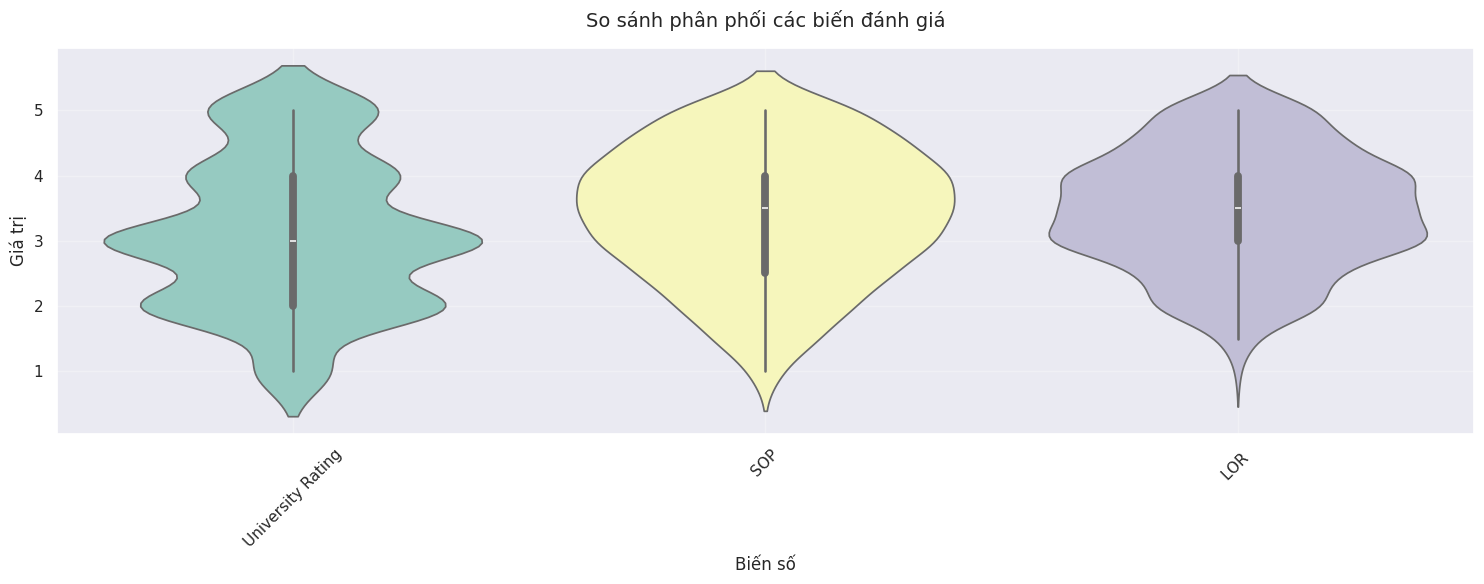

In [54]:
plt.figure(figsize=(15, 6))

# Chuy·ªÉn d·ªØ li·ªáu sang d·∫°ng long format ƒë·ªÉ v·∫Ω violin plot
df_rating_melt = pd.melt(df[ratings])

# V·∫Ω violin plot v·ªõi c√°c t√πy ch·ªânh v·ªÅ style
sns.violinplot(data=df_rating_melt, x='variable', y='value',
               palette='Set3', inner='box')

# T√πy ch·ªânh ƒë·ªì th·ªã
plt.title('So s√°nh ph√¢n ph·ªëi c√°c bi·∫øn ƒë√°nh gi√°', fontsize=14, pad=15)
plt.xlabel('Bi·∫øn s·ªë', fontsize=12)
plt.ylabel('Gi√° tr·ªã', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Hi·ªÉn th·ªã ƒë·ªì th·ªã
plt.tight_layout()
plt.show()

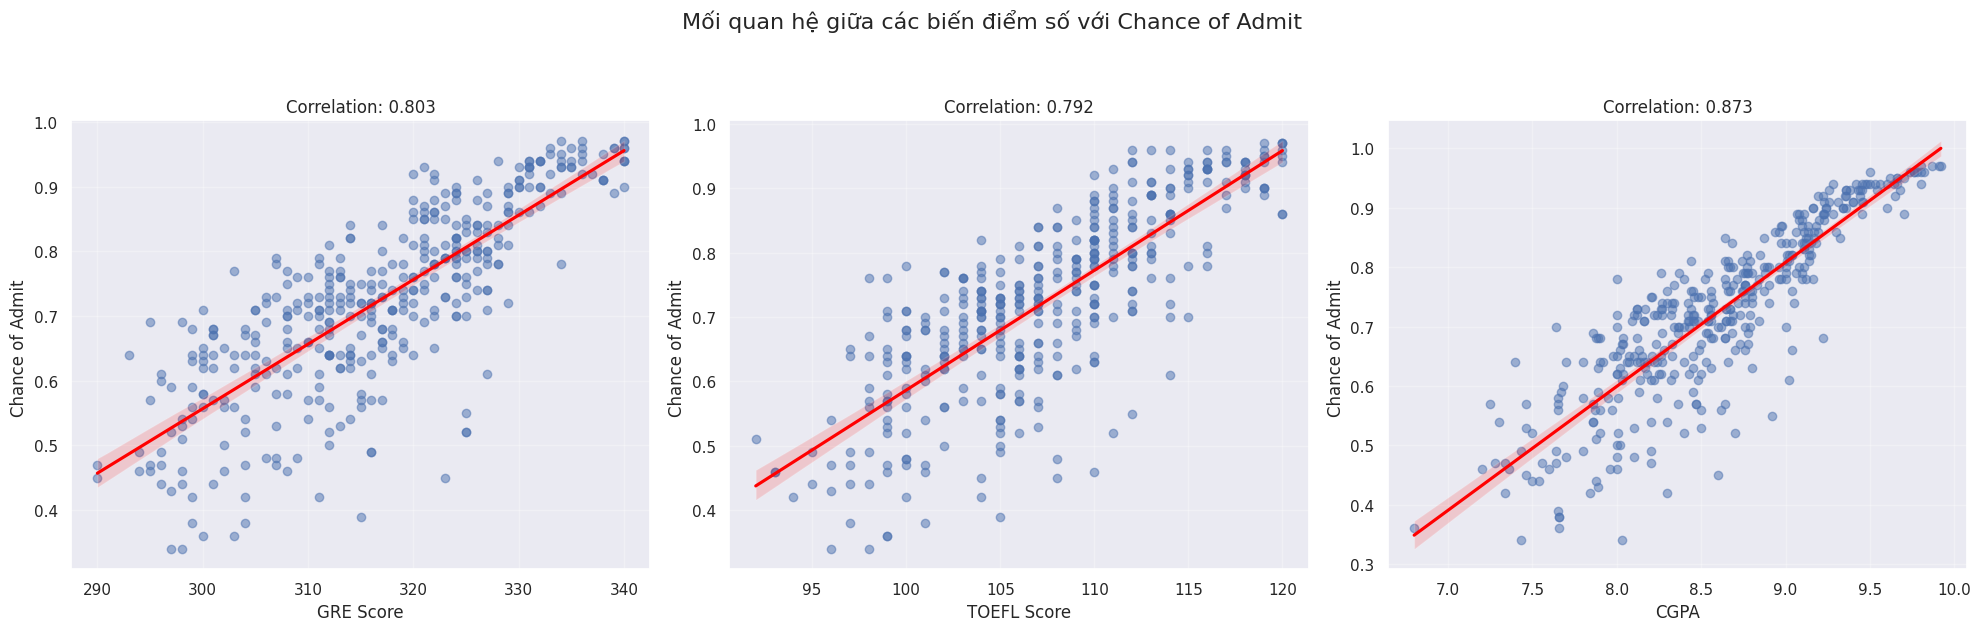

In [55]:
# B∆∞·ªõc 4: Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn ƒëi·ªÉm s·ªë v·ªõi Chance of Admit
# V·∫Ω Scatter plot v·ªõi Regression line

# T·∫°o subplot cho 3 bi·∫øn ƒëi·ªÉm s·ªë
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('M·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn ƒëi·ªÉm s·ªë v·ªõi Chance of Admit', fontsize=16, y=1.05)


# V·∫Ω scatter plot cho t·ª´ng bi·∫øn
for i, var in enumerate(scores):
    # V·∫Ω scatter plot
    sns.regplot(data=df, x=var, y='Chance of Admit ', ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    # T√≠nh h·ªá s·ªë t∆∞∆°ng quan
    corr = df[var].corr(df['Chance of Admit ']).round(3)
    
    # Th√™m ti√™u ƒë·ªÅ v√† nh√£n
    axes[i].set_title(f'Correlation: {corr}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Chance of Admit ')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

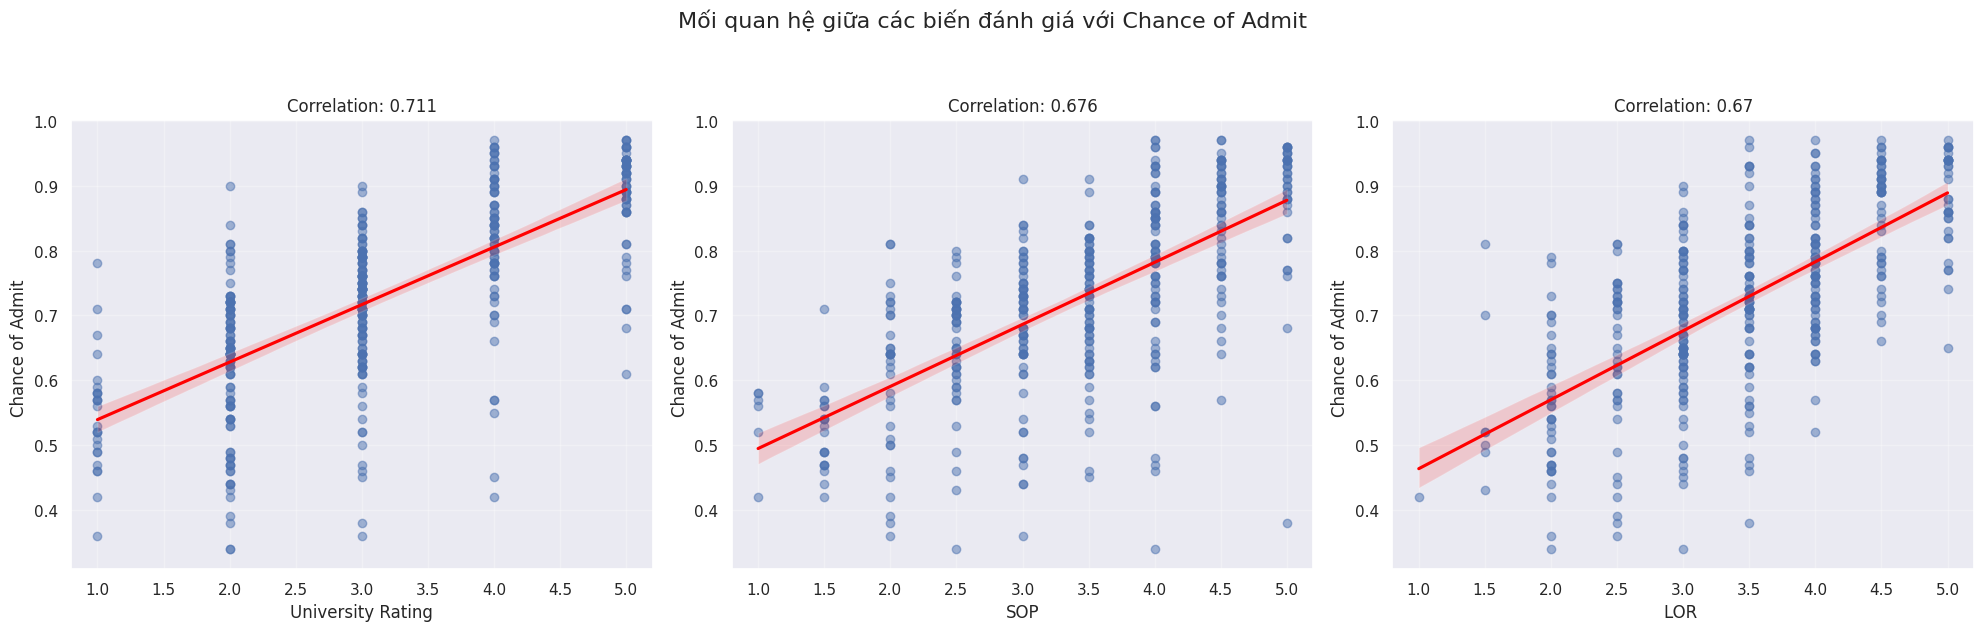

In [56]:
# T·∫°o subplot cho 3 bi·∫øn ƒë√°nh gi√°    
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('M·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn ƒë√°nh gi√° v·ªõi Chance of Admit', fontsize=16, y=1.05)


# V·∫Ω scatter plot cho t·ª´ng bi·∫øn
for i, var in enumerate(ratings):
    # V·∫Ω scatter plot
    sns.regplot(data=df, x=var, y='Chance of Admit ', ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    # T√≠nh h·ªá s·ªë t∆∞∆°ng quan
    corr = df[var].corr(df['Chance of Admit ']).round(3)
    
    # Th√™m ti√™u ƒë·ªÅ v√† nh√£n
    axes[i].set_title(f'Correlation: {corr}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Chance of Admit ')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

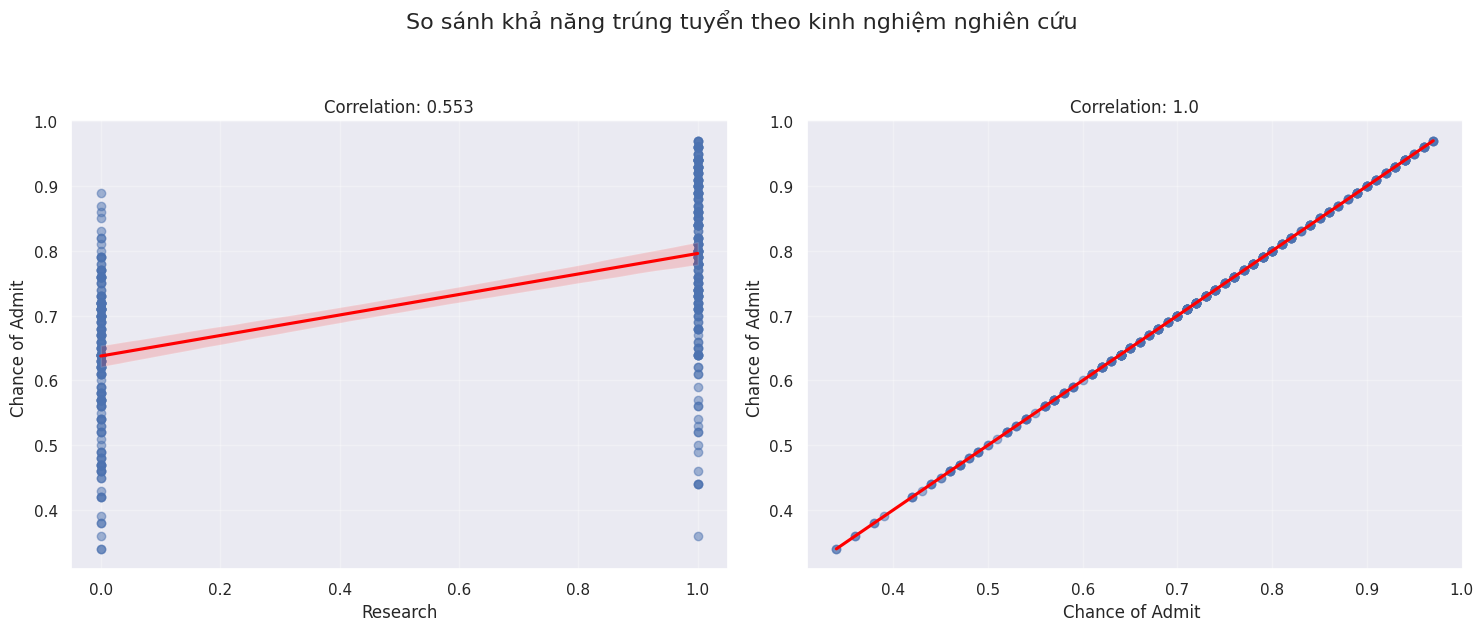

In [57]:
#t·∫°o subplot cho 2 bi·∫øn nghi√™n c·ª©u v√† Chance of Admit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('So s√°nh kh·∫£ nƒÉng tr√∫ng tuy·ªÉn theo kinh nghi·ªám nghi√™n c·ª©u', fontsize=16, y=1.05)

#v·∫Ω scatter plot cho t·ª´ng bi·∫øn
for i, var in enumerate(['Research', 'Chance of Admit ']):
    sns.regplot(data=df, x=var, y='Chance of Admit ', ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    #t√≠nh h·ªá s·ªë t∆∞∆°ng quan
    corr = df[var].corr(df['Chance of Admit ']).round(3)
    
    #th√™m ti√™u ƒë·ªÅ v√† nh√£n
    axes[i].set_title(f'Correlation: {corr}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Chance of Admit ')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


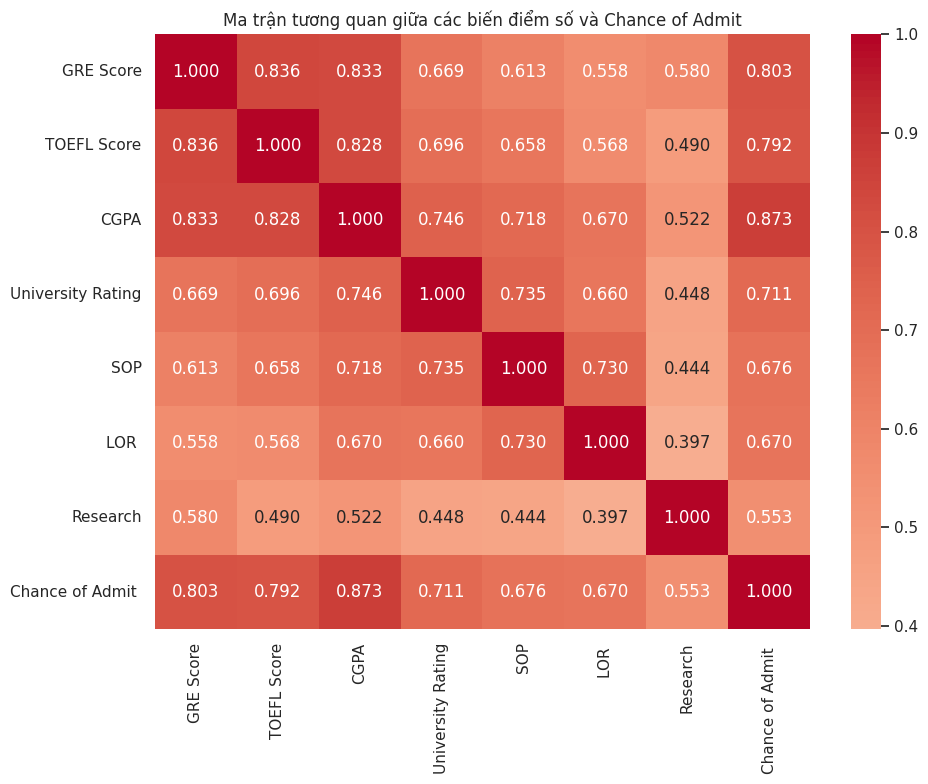

In [58]:
# Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn  v√† Chance of Admit
# T√≠nh ma tr·∫≠n t∆∞∆°ng quan cho c√°c bi·∫øn  v√† Chance of Admit
corr_matrix = df[scores + ratings + ['Research', 'Chance of Admit ']].corr()

# V·∫Ω heatmap cho ma tr·∫≠n t∆∞∆°ng quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn ƒëi·ªÉm s·ªë v√† Chance of Admit')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [60]:

# X√≥a kho·∫£ng tr·∫Øng ·ªü t√™n c·ªôt (n·∫øu c√≥)
df.columns = df.columns.str.strip()

# Ch·ªçn features v√† target
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Chia t·∫≠p train v√† test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [68]:


# Kh·ªüi t·∫°o m√¥ h√¨nh
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary l∆∞u k·∫øt qu·∫£
results = {}

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # T√≠nh to√°n c√°c ch·ªâ s·ªë ƒë√°nh gi√°
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

print("üìä K·∫øt qu·∫£ ƒë√°nh gi√° m√¥ h√¨nh:\n")
for name, metrics in results.items():
    print(f"üîπ {name}")
    for metric, value in metrics.items():
        print(f"   {metric}: {value:.4f}")
    print("-" * 30)

# H·ªì s∆° gi·∫£ l·∫≠p: GRE, TOEFL, Rating, SOP, LOR, CGPA, Research
sample_applicant = np.array([[337,118,4,4.5,4.5,9.65,1]])

# Chu·∫©n h√≥a h·ªì s∆°
sample_scaled = scaler.transform(sample_applicant)

# D·ª± ƒëo√°n v·ªõi t·ª´ng m√¥ h√¨nh
print("\nüîÆ D·ª± ƒëo√°n x√°c su·∫•t tr√∫ng tuy·ªÉn cho h·ªì s∆° m·ªõi:")
for name, model in models.items():
    predicted_chance = model.predict(sample_scaled)
    print(f"{name}: {predicted_chance[0]:.4f}")

üìä K·∫øt qu·∫£ ƒë√°nh gi√° m√¥ h√¨nh:

üîπ Linear Regression
   MAE: 0.0480
   MSE: 0.0046
   R2 Score: 0.8212
------------------------------
üîπ Random Forest
   MAE: 0.0498
   MSE: 0.0050
   R2 Score: 0.8079
------------------------------
üîπ Gradient Boosting
   MAE: 0.0501
   MSE: 0.0053
   R2 Score: 0.7958
------------------------------

üîÆ D·ª± ƒëo√°n x√°c su·∫•t tr√∫ng tuy·ªÉn cho h·ªì s∆° m·ªõi:
Linear Regression: 0.9468
Random Forest: 0.9441
Gradient Boosting: 0.9388


/home/nin/Documents/danglenin2202088/final_project/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
